In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [5]:
# Data Cleaning because there are sum null values

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
# By looking at data we find some null values therefore we want to drop some records
df=df.drop(122)

In [8]:
df[df.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
df.loc[:122, "Region"]=0
df.loc[122:, "Region"]=1

In [11]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
245,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [12]:
df[['Region']]=df[['Region']].astype(int)

In [13]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [15]:
# still there are some null values so we have to delete those records too
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [19]:
df=df.dropna().reset_index(drop=True)

In [17]:
# all nulls have deleted from data
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [18]:
# index 122 still have label names as like cols
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [20]:
df=df.drop(122).reset_index(drop=True)

In [28]:
df.shape

(243, 15)

In [21]:
# fix spaces in column names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [23]:
# Changes the required columns as int data type

In [22]:
df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']]=df[['month', 'day', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [ ]:
# change the other cols to float datatype

In [24]:
# change the other cols to float datatype
obj=[features for features in df.columns if df[features].dtypes=='O']

In [25]:
obj

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [26]:
for i in obj:
  if i !='Classes':
    df[i]=df[i].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [39]:
df.to_csv('Algerian_forest_fires_cleaned.csv', index=False)

In [ ]:
# Exploratory Dataset

In [40]:
# lot of same kind of categories are present in classes
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [41]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [28]:
## Encoding of the categories in the classes
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0, 1)

In [29]:
df=df.drop(['day', 'month', 'year'], axis=1)

In [30]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [47]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [31]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [60]:
X = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Classes', 'Region']]

In [61]:
y=df['FWI']

In [62]:
X.shape,y.shape


((243, 11), (243,))

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=42)

In [65]:
X_train.shape

(194, 11)

<Axes: >

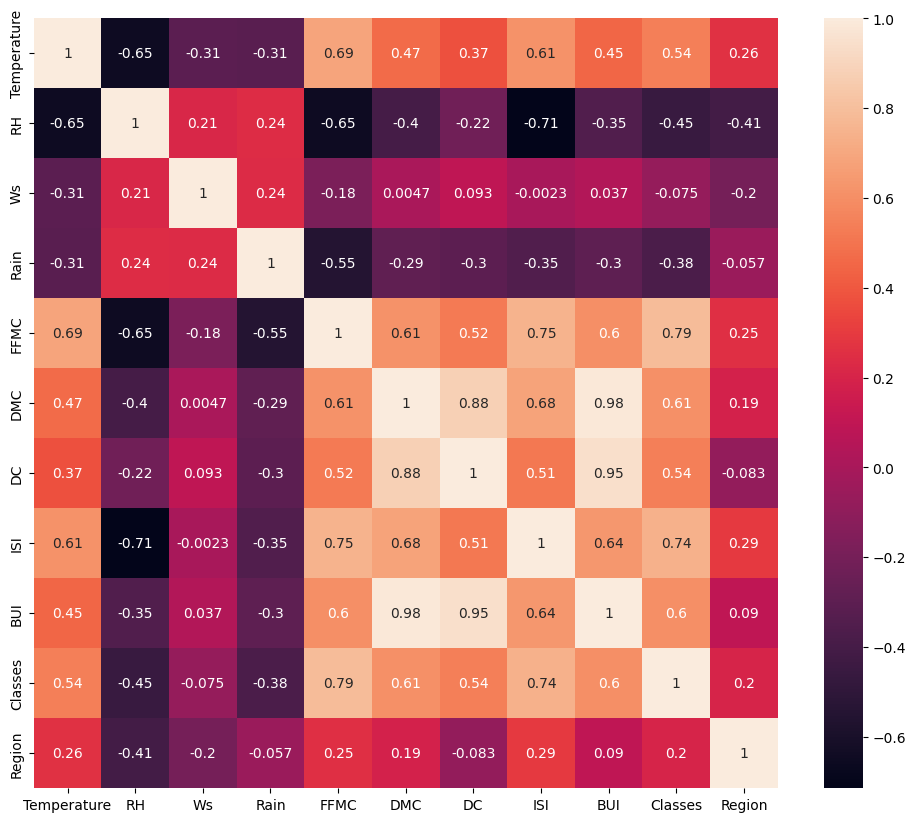

In [66]:
# check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr, annot=True)

In [67]:
def correlation(dataset, threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range (i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [68]:
# threshold--Domain expertise
corr_features=correlation(X_train, 0.85)

In [69]:
# drop features which have correlation greater than 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)


In [70]:
X_train.shape, X_test.shape

((194, 9), (49, 9))

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_sc= scaler.fit_transform(X_train)

In [72]:
X_test_sc= scaler.transform(X_test)

<ipython-input-73-e6a7a70752bc>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train After Scaling')

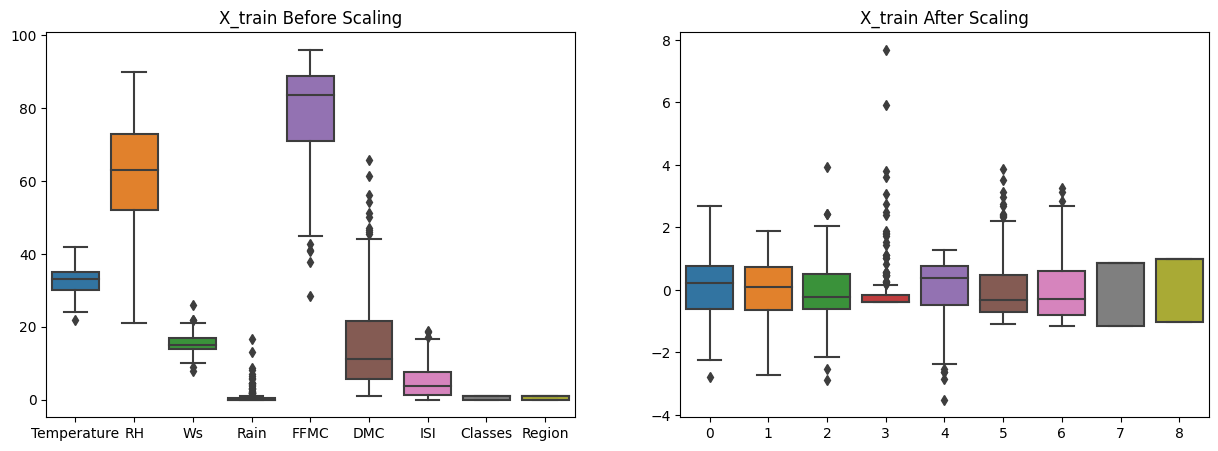

In [73]:
# Boxplot to understand the effect of Standard Scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_sc)
plt.title('X_train After Scaling')

In [74]:
# Linear Regression Plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
regression=LinearRegression()
regression.fit(X_train_sc, y_train)
y_pred=regression.predict(X_test_sc)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
r2score=r2_score(y_test, y_pred)
print("mean_squared_error", mse)
print("mean_absolute_error", mae)
print("R2_Score", r2score)

mean_squared_error 0.5882990110708693
mean_absolute_error 0.5049978694165687
R2_Score 0.9805895859259882


In [75]:
# Lasso Regression Plot
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_sc, y_train)
y_pred=lasso.predict(X_test_sc)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
r2score=r2_score(y_test, y_pred)
print("mean_squared_error", mse)
print("mean_absolute_error", mae)
print("R2_Score", r2score)

mean_squared_error 1.726042325023142
mean_absolute_error 1.0093958923873407
R2_Score 0.9430507350726562


In [76]:
# Ridge Regression Plot
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_sc, y_train)
y_pred=ridge.predict(X_test_sc)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
r2score=r2_score(y_test, y_pred)
print("mean_squared_error", mse)
print("mean_absolute_error", mae)
print("R2_Score", r2score)

mean_squared_error 0.6029616070548641
mean_absolute_error 0.5192048325844797
R2_Score 0.9801058063273599


In [77]:
# Elastic Net Regression
# Lasso Regression Plot
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
elasticnet.fit(X_train_sc, y_train)
y_pred=elasticnet.predict(X_test_sc)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
r2score=r2_score(y_test, y_pred)
print("mean_squared_error", mse)
print("mean_absolute_error", mae)
print("R2_Score", r2score)

mean_squared_error 4.009921298441002
mean_absolute_error 1.6834416340136709
R2_Score 0.8676961352267807


Among all four models I am going to consider Ridge regreesion because it helps to reduce overfitting

In [78]:
import pickle
pickle.dump(scaler,open('scaler.pkl', 'wb'))
pickle.dump(ridge,open('ridge.pkl', 'wb'))